In [1]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

sns.set_style('darkgrid')

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [13]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [16]:
#encoding the values of species 
def map_species(f):
    if f=='setosa':
         f=0
    elif f=='versicolor':
         f=1
    elif f=='virginica':
         f=2
    return f

In [18]:
df['species']=df['species'].map(map_species)

In [20]:
df['species'].unique()

array([0, 1, 2], dtype=int64)

In [21]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


C:\Users\pabhilash\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


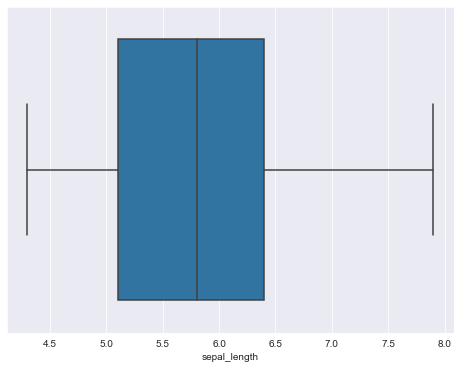

C:\Users\pabhilash\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


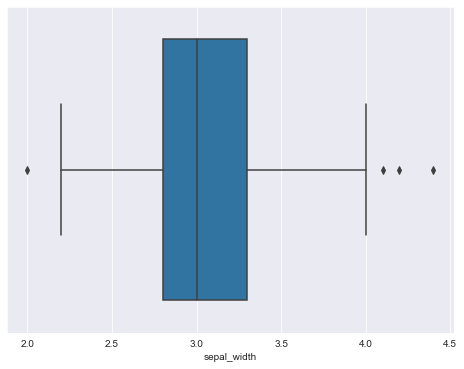

C:\Users\pabhilash\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


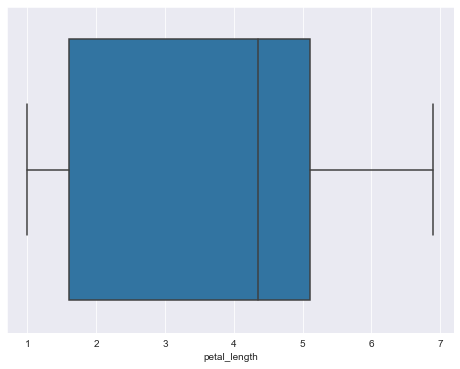

C:\Users\pabhilash\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


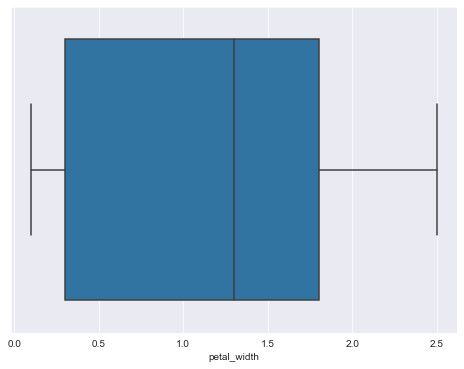

In [28]:
for i in df.columns[:-1]:
    plt.figure(figsize=(8,6))
    sns.boxplot(df[i])
    plt.show()

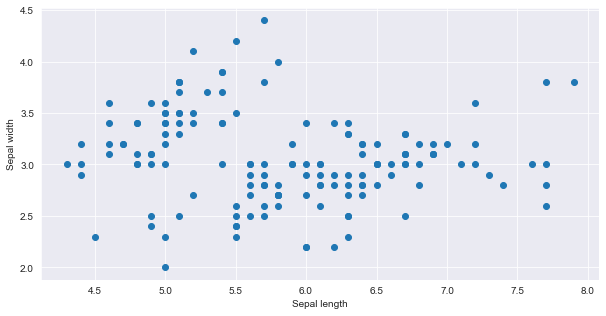

In [40]:
plt.figure(figsize=(10,5))
plt.scatter(df['sepal_length'],df['sepal_width'])
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()

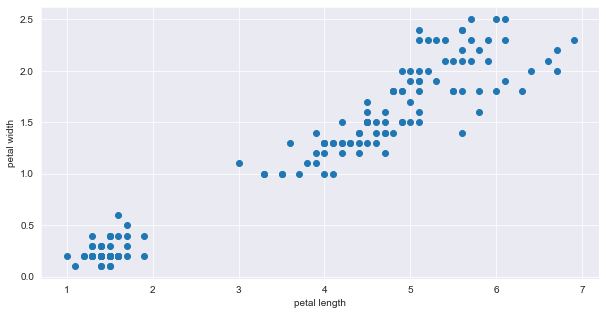

In [41]:
plt.figure(figsize=(10,5))
plt.scatter(df['petal_length'],df['petal_width'])
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.show()

In [29]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [30]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [32]:
lg = LogisticRegression()

In [33]:
lg.fit(X,y)

LogisticRegression()

In [34]:
pred = lg.predict(X_test)

In [35]:
print("CLASSIFICATION REPORT")
print(classification_report(y_test,pred))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [37]:
print("ACCURACY")
print(accuracy_score(y_test,pred))

ACCURACY
1.0


CONFUSION MATRIX


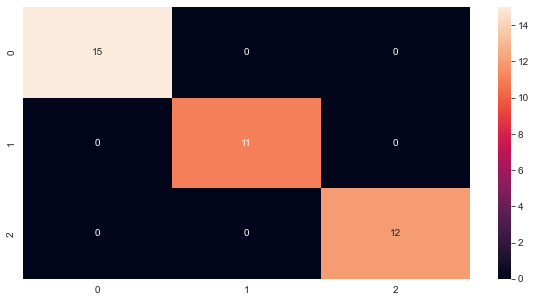

In [38]:
print("CONFUSION MATRIX")
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)
plt.show()